<a href="https://colab.research.google.com/github/AbrahamtheAraiza99/inteligencia-artificial/blob/master/colab_codigo_de_redes_convulsionales_de_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import numpy as np

train_imgs, train_labels = np.array([np.array(i[0]) for i in trainset]), np.array([i[1] for i in trainset])
test_imgs, test_labels = np.array([np.array(i[0]) for i in testset]), np.array([i[1] for i in testset])

train_imgs.shape, test_imgs.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

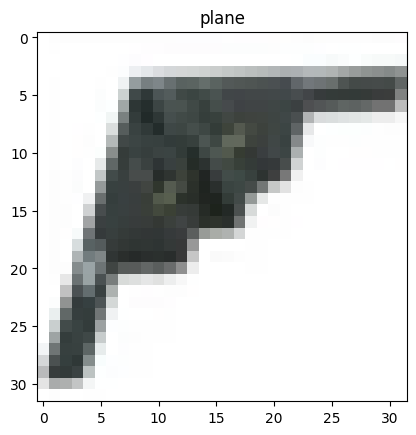

In [ ]:
import random
import matplotlib.pyplot as plt

ix = random.randint(0, len(train_imgs))
img, label = train_imgs[ix], train_labels[ix]

plt.imshow(img)
plt.title(classes[label])
plt.show()

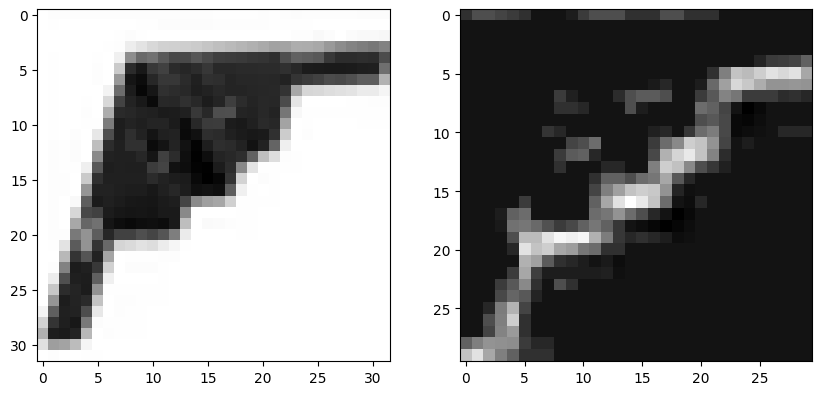

In [ ]:
import numpy as np
import scipy.signal
from skimage import color
from skimage import exposure

img = color.rgb2gray(img)

kernel = np.array([[1,1,1],
                   [0,0,0],
                   [-1,-1,-1]])

edges = scipy.signal.convolve2d(img, kernel, 'valid')
edges = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img, cmap=plt.cm.gray)
ax2.imshow(edges, cmap=plt.cm.gray)
plt.show()

Si aplicamos ahora el mismo filtro, pero transpuesto, obtenemos un detector de líneas verticales.

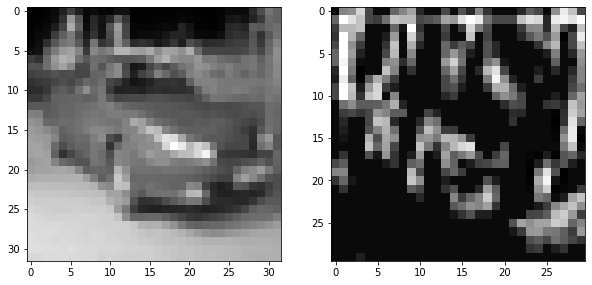

In [ ]:
kernel = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

edges = scipy.signal.convolve2d(img, kernel, 'valid')
edges = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img, cmap=plt.cm.gray)
ax2.imshow(edges, cmap=plt.cm.gray)
plt.show()

De la misma manera, el siguiente filtro será útil para detectar bordes en cualquier orientación.

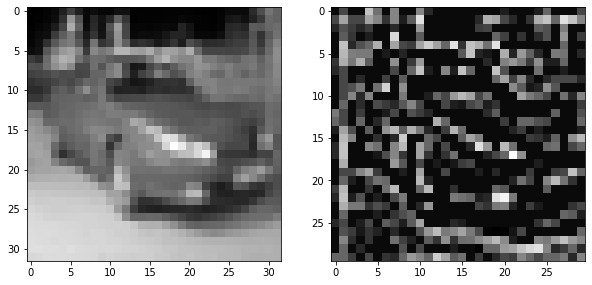

In [ ]:
kernel = np.array([[0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]])

edges = scipy.signal.convolve2d(img, kernel, 'valid')
edges = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img, cmap=plt.cm.gray)
ax2.imshow(edges, cmap=plt.cm.gray)
plt.show()

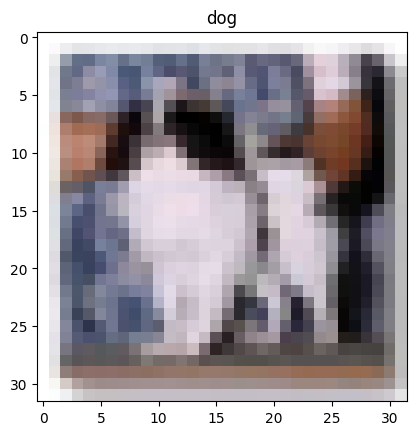

In [ ]:
ix = random.randint(0, len(train_imgs))
img, label = train_imgs[ix], train_labels[ix]

plt.imshow(img)
plt.title(classes[label])
plt.show()

In [ ]:
# convertir la imágen en tensor con dimensiones (N, C_in, H, W)

img_tensor = torch.from_numpy(img / 255.).unsqueeze(0)
img_tensor = img_tensor.permute(0, 3, 1, 2).float()

img_tensor.shape, img_tensor.dtype

(torch.Size([1, 3, 32, 32]), torch.float32)

In [ ]:
# aplicamos 10 filtros de tamaño 3x3

conv = torch.nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H', W')
output.shape

torch.Size([1, 10, 30, 30])

In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3, padding = 1, stride = 1)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H', W')
output.shape

torch.Size([1, 10, 32, 32])

In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3, padding = 1, stride = 2)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H', W')
output.shape

torch.Size([1, 10, 16, 16])

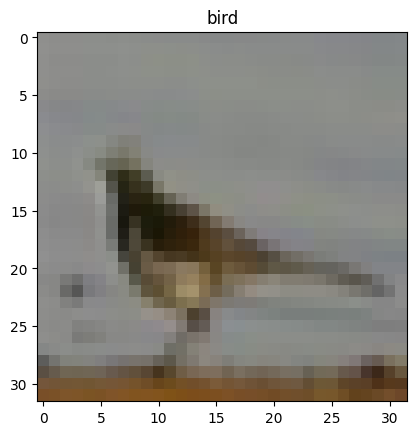

In [ ]:
ix = random.randint(0, len(train_imgs))
img, label = train_imgs[ix], train_labels[ix]

plt.imshow(img)
plt.title(classes[label])
plt.show()

In [ ]:
pool = torch.nn.MaxPool2d(3, padding=1, stride=2)

img_tensor = torch.from_numpy(img / 255.).unsqueeze(0).permute(0, 3, 1, 2).float()
output = pool(img_tensor)
output.shape

torch.Size([1, 3, 16, 16])

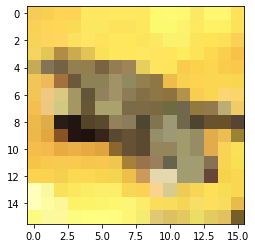

In [ ]:
plt.imshow(output.squeeze(0).permute(1,2,0))
plt.show()

In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(torchvision.datasets.MNIST('../data', train=True, download=True,
                       transform=torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Normalize((0.1307,), (0.3081,))
                            ])
                      ), batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(torchvision.datasets.MNIST('../data', train=False,
                   transform=torchvision.transforms.Compose([
                        torchvision.transforms.ToTensor(),
                        torchvision.transforms.Normalize((0.1307,), (0.3081,))
                        ])
                     ), batch_size=64, shuffle=False, pin_memory=True)
}

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.55MB/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.15MB/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Vamos a definir una `red convolucional` con varias `capas convolucionales` y `capas de pooling`. Para poder clasificar las imágenes, conectaremos las salidas de la última capa de la red convolucional con un `MLP` para obtener las predicciones finales.

In [ ]:
def block(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(pk, stride=ps)
    )

def block2(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.ReLU()
    )

class CNN(torch.nn.Module):
  def __init__(self, n_channels=1, n_outputs=10):
    super().__init__()
    self.conv1 = block(n_channels, 64)
    self.conv2 = block(64, 128)
    self.fc = torch.nn.Linear(128*7*7, n_outputs)

  def forward(self, x):
    print("Dimensiones:")
    print("Entrada: ", x.shape)
    x = self.conv1(x)
    print("conv1: ", x.shape)
    x = self.conv2(x)
    print("conv2: ", x.shape)
    x = x.view(x.shape[0], -1)
    print("pre fc: ", x.shape)
    x = self.fc(x)
    print("Salida: ", x.shape)
    return x

In [ ]:
model = CNN()

output = model(torch.randn(64, 1, 28, 28))

In [ ]:
class CNN(torch.nn.Module):
  def __init__(self, n_channels=1, n_outputs=10):
    super().__init__()
    self.conv1 = block(n_channels, 64)
    self.conv2 = block(64, 128)
    self.fc = torch.nn.Linear(128*7*7, n_outputs)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [1]:
model = CNN()
fit(model, dataloader)

NameError: name 'CNN' is not defined